In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import pyperclip
import warnings
warnings.filterwarnings('ignore')

## DATAFRAMES POR INSTANCIA

In [2]:
# Leer los datos del archivo csv en el archivo de la carpeta output y guardarlos en un dataframe
df = pd.read_csv('../output/results.csv')
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free
0,a05100,5,100,1709.0,0.300041,0,3206.0,0.642708,0,1700.0,...,0,1698.0,48.5130,0,1698.0,22,0,1700.0,26.71440,0
1,a20100,20,100,1170.0,0.070708,0,2972.0,0.296250,0,1168.0,...,0,1161.0,36.1567,0,1163.0,48,0,1203.0,61.94310,0
2,a10100,10,100,1390.0,0.051250,0,2954.0,0.155958,0,1367.0,...,0,1363.0,25.5745,0,1369.0,22,0,1367.0,39.89410,0
3,a05200,5,200,3259.0,0.077500,0,6075.0,0.188166,0,3238.0,...,0,3235.0,136.1530,0,3235.0,49,0,3235.0,130.07300,0
4,a20200,20,200,2371.0,0.146666,0,5855.0,0.600042,0,2353.0,...,0,2345.0,241.9350,0,2349.0,202,0,2366.0,293.03600,0
5,a10200,10,200,2670.0,0.114375,0,6183.0,0.310375,0,2632.0,...,0,2629.0,191.8910,0,2633.0,95,0,2642.0,197.86400,0
6,b10200,10,200,8255.0,0.089542,42,6031.0,0.314959,0,7788.0,...,33,3007.0,161.9430,0,2969.0,91,0,3246.0,132.21200,0
7,b20200,20,200,3628.0,0.146000,7,5860.0,0.598042,0,3335.0,...,0,2437.0,239.8600,0,2359.0,150,0,2439.0,284.91500,0
8,b05200,5,200,8050.0,0.067667,40,6059.0,0.187167,0,7487.0,...,37,3640.0,118.3090,0,3687.0,67,0,3927.0,79.82720,0
9,b10100,10,100,2115.0,0.050250,4,2980.0,0.157417,0,1952.0,...,0,1439.0,28.0520,0,1443.0,22,0,1466.0,30.48810,0


In [3]:
# column name contains the word cost
heuristics = df.columns[df.columns.str.contains('cost')].map(lambda x: x.split('_')[0]).unique()
heuristics

Index(['Greedy', 'Binpacking', 'Swap(Greedy)', 'Swap(Bin Packing)',
       'Relocate(Greedy)', 'Relocate(Bin Packing)', 'Swap+Relocate(Greedy)',
       'Swap+Relocate(Bin Packing)', 'Relocate+Swap(Greedy)',
       'Relocate+Swap(Bin Packing)', 'Tabu', 'RVND'],
      dtype='object')

In [4]:
df["InstanceGroup"] = df["Filename"].str[0]
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free,InstanceGroup
0,a05100,5,100,1709.0,0.300041,0,3206.0,0.642708,0,1700.0,...,1698.0,48.5130,0,1698.0,22,0,1700.0,26.71440,0,a
1,a20100,20,100,1170.0,0.070708,0,2972.0,0.296250,0,1168.0,...,1161.0,36.1567,0,1163.0,48,0,1203.0,61.94310,0,a
2,a10100,10,100,1390.0,0.051250,0,2954.0,0.155958,0,1367.0,...,1363.0,25.5745,0,1369.0,22,0,1367.0,39.89410,0,a
3,a05200,5,200,3259.0,0.077500,0,6075.0,0.188166,0,3238.0,...,3235.0,136.1530,0,3235.0,49,0,3235.0,130.07300,0,a
4,a20200,20,200,2371.0,0.146666,0,5855.0,0.600042,0,2353.0,...,2345.0,241.9350,0,2349.0,202,0,2366.0,293.03600,0,a
5,a10200,10,200,2670.0,0.114375,0,6183.0,0.310375,0,2632.0,...,2629.0,191.8910,0,2633.0,95,0,2642.0,197.86400,0,a
6,b10200,10,200,8255.0,0.089542,42,6031.0,0.314959,0,7788.0,...,3007.0,161.9430,0,2969.0,91,0,3246.0,132.21200,0,b
7,b20200,20,200,3628.0,0.146000,7,5860.0,0.598042,0,3335.0,...,2437.0,239.8600,0,2359.0,150,0,2439.0,284.91500,0,b
8,b05200,5,200,8050.0,0.067667,40,6059.0,0.187167,0,7487.0,...,3640.0,118.3090,0,3687.0,67,0,3927.0,79.82720,0,b
9,b10100,10,100,2115.0,0.050250,4,2980.0,0.157417,0,1952.0,...,1439.0,28.0520,0,1443.0,22,0,1466.0,30.48810,0,b


In [5]:
# Separo las instancias
a_instance = df[df["InstanceGroup"] == "a"]
b_instance = df[df["InstanceGroup"] == "b"]
e_instance = df[df["InstanceGroup"] == "e"]
real_instance = df[df["InstanceGroup"] == "r"]


In [6]:
len(df)

28

In [7]:
# join a_instance[['Depositos', 'Vendedores']] with b_instance[['Depositos', 'Vendedores']] with e_instance[['Depositos', 'Vendedores']] with real_instance[['Depositos', 'Vendedores']]

# rename columns

a_table = a_instance[['Depositos', 'Vendedores']].rename(columns={'Depositos': 'Depositos_a', 'Vendedores': 'Vendedores_a'}).reset_index(drop=True)
b_table = b_instance[['Depositos', 'Vendedores']].rename(columns={'Depositos': 'Depositos_b', 'Vendedores': 'Vendedores_b'}).reset_index(drop=True)
e_table = e_instance[['Depositos', 'Vendedores']].rename(columns={'Depositos': 'Depositos_e', 'Vendedores': 'Vendedores_e'}).reset_index(drop=True)

# join tables
table = pd.concat([a_table, b_table, e_table], axis=1).fillna("")
print(table.to_markdown(index=False))

| Depositos_a   | Vendedores_a   | Depositos_b   | Vendedores_b   |   Depositos_e |   Vendedores_e |
|:--------------|:---------------|:--------------|:---------------|--------------:|---------------:|
| 5.0           | 100.0          | 10.0          | 200.0          |            40 |           1600 |
| 20.0          | 100.0          | 20.0          | 200.0          |            15 |            900 |
| 10.0          | 100.0          | 5.0           | 200.0          |            60 |            900 |
| 5.0           | 200.0          | 10.0          | 100.0          |            80 |           1600 |
| 20.0          | 200.0          | 20.0          | 100.0          |            30 |            900 |
| 10.0          | 200.0          | 5.0           | 100.0          |            40 |            400 |
|               |                |               |                |            20 |           1600 |
|               |                |               |                |            20 |        

In [8]:
# Get "Depositos", "Vendedores" columns from a instance
print(e_instance[['Depositos', 'Vendedores']].to_markdown(index=False))

|   Depositos |   Vendedores |
|------------:|-------------:|
|          40 |         1600 |
|          15 |          900 |
|          60 |          900 |
|          80 |         1600 |
|          30 |          900 |
|          40 |          400 |
|          20 |         1600 |
|          20 |          400 |
|          10 |          400 |
|           5 |          100 |
|          10 |          100 |
|          20 |          100 |
|           5 |          200 |
|          10 |          200 |
|          20 |          200 |


In [9]:
instances = df["InstanceGroup"].unique()

## Costo de cada instancia

In [10]:
# COSTO DE CADA INSTANCIA
costs = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "time" or "free", filter it

for cost in costs:
    cost = cost.drop(cost.columns[cost.columns.str.contains('time')], axis=1, inplace=True)

for cost in costs:
    cost = cost.drop(cost.columns[cost.columns.str.contains('free')], axis=1, inplace=True)



In [11]:
# column name contains the word cost
heuristics = df.columns[df.columns.str.contains('cost')].map(lambda x: x.split('_')[0]).unique()
heuristics

Index(['Greedy', 'Binpacking', 'Swap(Greedy)', 'Swap(Bin Packing)',
       'Relocate(Greedy)', 'Relocate(Bin Packing)', 'Swap+Relocate(Greedy)',
       'Swap+Relocate(Bin Packing)', 'Relocate+Swap(Greedy)',
       'Relocate+Swap(Bin Packing)', 'Tabu', 'RVND'],
      dtype='object')

In [12]:
df["InstanceGroup"] = df["Filename"].str[0]
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free,InstanceGroup
0,a05100,5,100,1709.0,0.300041,0,3206.0,0.642708,0,1700.0,...,1698.0,48.5130,0,1698.0,22,0,1700.0,26.71440,0,a
1,a20100,20,100,1170.0,0.070708,0,2972.0,0.296250,0,1168.0,...,1161.0,36.1567,0,1163.0,48,0,1203.0,61.94310,0,a
2,a10100,10,100,1390.0,0.051250,0,2954.0,0.155958,0,1367.0,...,1363.0,25.5745,0,1369.0,22,0,1367.0,39.89410,0,a
3,a05200,5,200,3259.0,0.077500,0,6075.0,0.188166,0,3238.0,...,3235.0,136.1530,0,3235.0,49,0,3235.0,130.07300,0,a
4,a20200,20,200,2371.0,0.146666,0,5855.0,0.600042,0,2353.0,...,2345.0,241.9350,0,2349.0,202,0,2366.0,293.03600,0,a
5,a10200,10,200,2670.0,0.114375,0,6183.0,0.310375,0,2632.0,...,2629.0,191.8910,0,2633.0,95,0,2642.0,197.86400,0,a
6,b10200,10,200,8255.0,0.089542,42,6031.0,0.314959,0,7788.0,...,3007.0,161.9430,0,2969.0,91,0,3246.0,132.21200,0,b
7,b20200,20,200,3628.0,0.146000,7,5860.0,0.598042,0,3335.0,...,2437.0,239.8600,0,2359.0,150,0,2439.0,284.91500,0,b
8,b05200,5,200,8050.0,0.067667,40,6059.0,0.187167,0,7487.0,...,3640.0,118.3090,0,3687.0,67,0,3927.0,79.82720,0,b
9,b10100,10,100,2115.0,0.050250,4,2980.0,0.157417,0,1952.0,...,1439.0,28.0520,0,1443.0,22,0,1466.0,30.48810,0,b


## Tiempo de cada instancia

In [13]:
# COSTO DE CADA INSTANCIA
times = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "cost" or "free", filter it

for time in times:
    time = time.drop(time.columns[time.columns.str.contains('cost')], axis=1, inplace=True)

for time in times:
    time = time.drop(time.columns[time.columns.str.contains('free')], axis=1, inplace=True)

times[0]

,Filename,Depositos,Vendedores,Greedy_time,Binpacking_time,Swap(Greedy)_time,Swap(Bin Packing)_time,Relocate(Greedy)_time,Relocate(Bin Packing)_time,Swap+Relocate(Greedy)_time,Swap+Relocate(Bin Packing)_time,Relocate+Swap(Greedy)_time,Relocate+Swap(Bin Packing)_time,Tabu_time,RVND_time,InstanceGroup
0,a05100,5,100,0.300041,0.642708,5.67192,48.2527,0.545874,6.90946,2.02358,8.96271,5.73554,48.5130,22,26.7144,a
1,a20100,20,100,0.070708,0.296250,1.11150,32.5086,0.196458,18.74900,1.25987,19.47450,1.33971,36.1567,48,61.9431,a
2,a10100,10,100,0.051250,0.155958,1.75696,24.7897,0.117834,8.85408,1.81146,9.20300,1.92554,25.5745,22,39.8941,a
3,a05200,5,200,0.077500,0.188166,5.82983,135.5870,0.154791,15.01270,5.96042,17.43070,5.90467,136.1530,49,130.0730,a
4,a20200,20,200,0.146666,0.600042,7.04658,233.7990,0.382374,73.46420,7.29054,77.60300,7.28033,241.9350,202,293.0360,a
5,a10200,10,200,0.114375,0.310375,14.45300,189.6160,0.254750,36.23020,14.67820,40.12690,14.87570,191.8910,95,197.8640,a


## Vendedores sin asignar de cada instancia

In [14]:
# Libres
frees = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "time" or "cost", filter it

for free in frees:
    free = free.drop(free.columns[free.columns.str.contains('cost')], axis=1, inplace=True)

for free in frees:
    free = free.drop(free.columns[free.columns.str.contains('time')], axis=1, inplace=True)

frees[0]

,Filename,Depositos,Vendedores,Greedy_free,Binpacking_free,Swap(Greedy)_free,Swap(Bin Packing)_free,Relocate(Greedy)_free,Relocate(Bin Packing)_free,Swap+Relocate(Greedy)_free,Swap+Relocate(Bin Packing)_free,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_free,Tabu_free,RVND_free,InstanceGroup
0,a05100,5,100,0,0,0,0,0,0,0,0,0,0,0,0,a
1,a20100,20,100,0,0,0,0,0,0,0,0,0,0,0,0,a
2,a10100,10,100,0,0,0,0,0,0,0,0,0,0,0,0,a
3,a05200,5,200,0,0,0,0,0,0,0,0,0,0,0,0,a
4,a20200,20,200,0,0,0,0,0,0,0,0,0,0,0,0,a
5,a10200,10,200,0,0,0,0,0,0,0,0,0,0,0,0,a


In [15]:
# Print de las instancias
display(Markdown('## Instancia A'))
display(a_instance)

display(Markdown('## Instancia B'))
display(b_instance)

display(Markdown('## Instancia E'))
display(e_instance)

display(Markdown('## Instancia Real'))
display(real_instance)

## Instancia A

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free,InstanceGroup
0,a05100,5,100,1709.0,0.300041,0,3206.0,0.642708,0,1700.0,...,1698.0,48.5130,0,1698.0,22,0,1700.0,26.7144,0,a
1,a20100,20,100,1170.0,0.070708,0,2972.0,0.296250,0,1168.0,...,1161.0,36.1567,0,1163.0,48,0,1203.0,61.9431,0,a
2,a10100,10,100,1390.0,0.051250,0,2954.0,0.155958,0,1367.0,...,1363.0,25.5745,0,1369.0,22,0,1367.0,39.8941,0,a
3,a05200,5,200,3259.0,0.077500,0,6075.0,0.188166,0,3238.0,...,3235.0,136.1530,0,3235.0,49,0,3235.0,130.0730,0,a
4,a20200,20,200,2371.0,0.146666,0,5855.0,0.600042,0,2353.0,...,2345.0,241.9350,0,2349.0,202,0,2366.0,293.0360,0,a
5,a10200,10,200,2670.0,0.114375,0,6183.0,0.310375,0,2632.0,...,2629.0,191.8910,0,2633.0,95,0,2642.0,197.8640,0,a


## Instancia B

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free,InstanceGroup
6,b10200,10,200,8255.0,0.089542,42,6031.0,0.314959,0,7788.0,...,3007.0,161.9430,0,2969.0,91,0,3246.0,132.21200,0,b
7,b20200,20,200,3628.0,0.146000,7,5860.0,0.598042,0,3335.0,...,2437.0,239.8600,0,2359.0,150,0,2439.0,284.91500,0,b
8,b05200,5,200,8050.0,0.067667,40,6059.0,0.187167,0,7487.0,...,3640.0,118.3090,0,3687.0,67,0,3927.0,79.82720,0,b
9,b10100,10,100,2115.0,0.050250,4,2980.0,0.157417,0,1952.0,...,1439.0,28.0520,0,1443.0,22,0,1466.0,30.48810,0,b
10,b20100,20,100,1660.0,0.076375,2,3006.0,0.297166,0,1512.0,...,1221.0,32.9706,0,1195.0,37,0,1232.0,65.91270,0,b
11,b05100,5,100,4972.0,0.031042,27,2979.0,0.092833,0,4677.0,...,1985.0,10.9245,0,1962.0,13,0,2797.0,1.02963,1,b


## Instancia E

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free,InstanceGroup
12,e401600,40,1600,3550530.0,1.391710,1186,1496530.0,9.319500,0,3528280.0,...,1225240.0,88198.1000,0,1256900.0,14598,0,1266920.0,29361.2000,0,e
13,e15900,15,900,1675160.0,0.364750,628,681052.0,2.144870,0,1665340.0,...,517134.0,14058.3000,0,537249.0,3281,0,564579.0,5408.7700,0,e
14,e60900,60,900,1879710.0,1.165420,615,868102.0,7.716920,0,1867030.0,...,672586.0,16516.0000,0,488219.0,5835,0,701185.0,6903.5300,0,e
15,e801600,80,1600,3559140.0,2.822210,1167,1563090.0,18.613800,0,3534730.0,...,1249640.0,99086.4000,0,1299590.0,21685,0,1292820.0,35270.2000,0,e
16,e30900,30,900,1900960.0,0.622417,643,807924.0,4.079210,0,1890960.0,...,629667.0,15555.6000,0,665695.0,4160,0,660802.0,5982.8300,0,e
17,e40400,40,400,739996.0,0.381459,239,368473.0,2.329790,0,733089.0,...,254557.0,1513.2100,0,275140.0,862,0,273805.0,890.5670,0,e
18,e201600,20,1600,3261900.0,0.818584,1164,1350790.0,4.986370,0,3250960.0,...,1076760.0,84686.7000,0,1114640.0,10891,0,1100770.0,29769.0000,0,e
19,e20400,20,400,746075.0,0.214750,265,320970.0,1.207040,0,741821.0,...,234469.0,1269.9700,0,239785.0,712,0,256114.0,625.1510,0,e
20,e10400,10,400,633169.0,0.132375,261,272013.0,0.656792,0,628674.0,...,184732.0,1117.7300,0,203881.0,657,0,204180.0,488.5060,0,e
21,e05100,5,100,92769.0,0.027292,46,53515.0,0.094875,0,91313.0,...,24232.0,16.3054,0,26893.0,14,0,29490.0,13.2927,0,e


## Instancia Real

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Tabu_cost,Tabu_time,Tabu_free,RVND_cost,RVND_time,RVND_free,InstanceGroup
27,real_instance,310,1100,964.9,9.84775,0,10629.0,39.621,0,824.2,...,764.7,74175.0,0,791.8,55719,0,718.9,126242.0,0,r


## GRAFICOS

### 1. COSTOS

In [16]:
# row 10 from df

df.iloc[1]

Filename                             a20100
Depositos                                20
Vendedores                              100
Greedy_cost                          1170.0
Greedy_time                        0.070708
Greedy_free                               0
Binpacking_cost                      2972.0
Binpacking_time                     0.29625
Binpacking_free                           0
Swap(Greedy)_cost                    1168.0
Swap(Greedy)_time                    1.1115
Swap(Greedy)_free                         0
Swap(Bin Packing)_cost               1245.0
Swap(Bin Packing)_time              32.5086
Swap(Bin Packing)_free                    0
Relocate(Greedy)_cost                1170.0
Relocate(Greedy)_time              0.196458
Relocate(Greedy)_free                     0
Relocate(Bin Packing)_cost           1165.0
Relocate(Bin Packing)_time           18.749
Relocate(Bin Packing)_free                0
Swap+Relocate(Greedy)_cost           1168.0
Swap+Relocate(Greedy)_time      

In [17]:
# how many rows in df
len(df)

28

Text(0.5, 0.98, 'Instancia A - Costo')

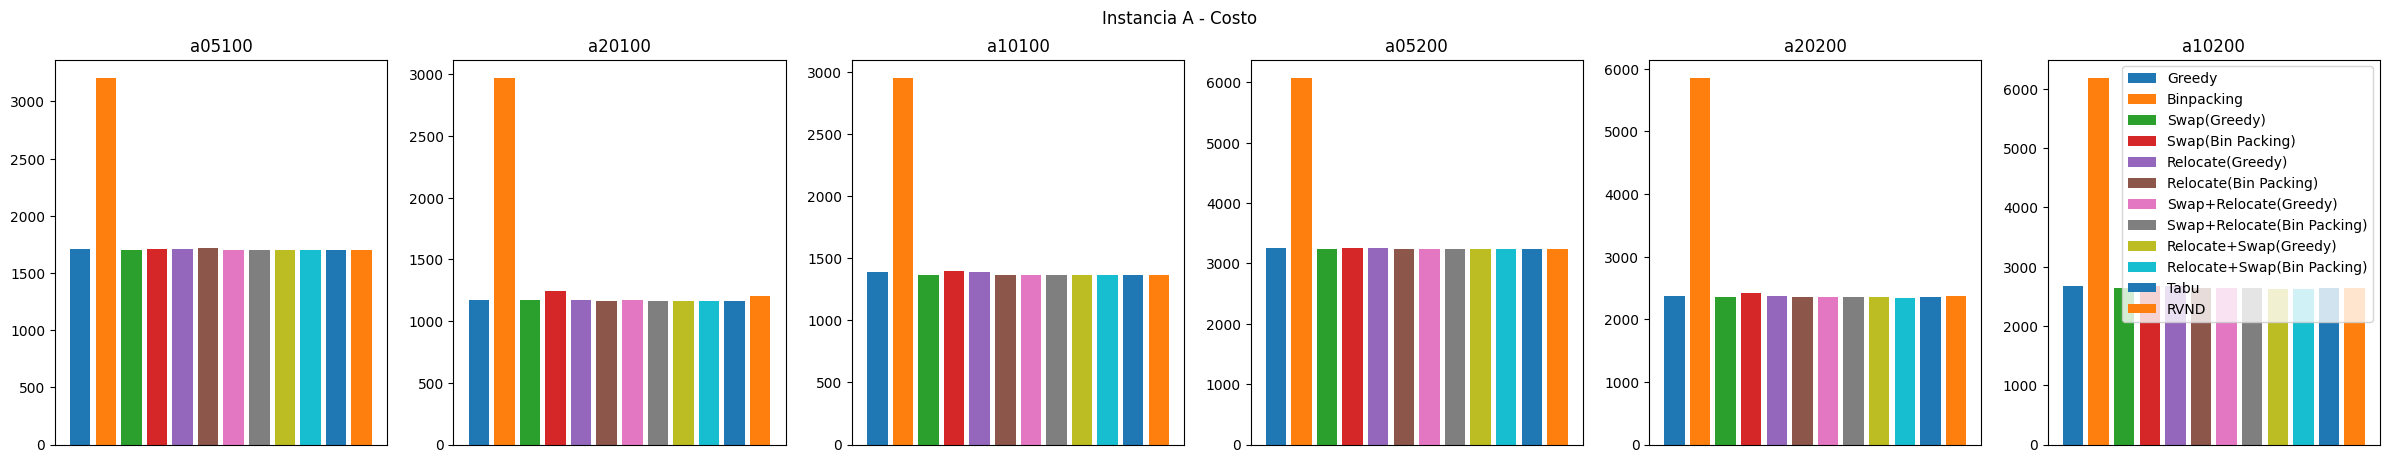

In [18]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia A - Costo")

Text(0.5, 0.98, 'Instancia B - Costo')

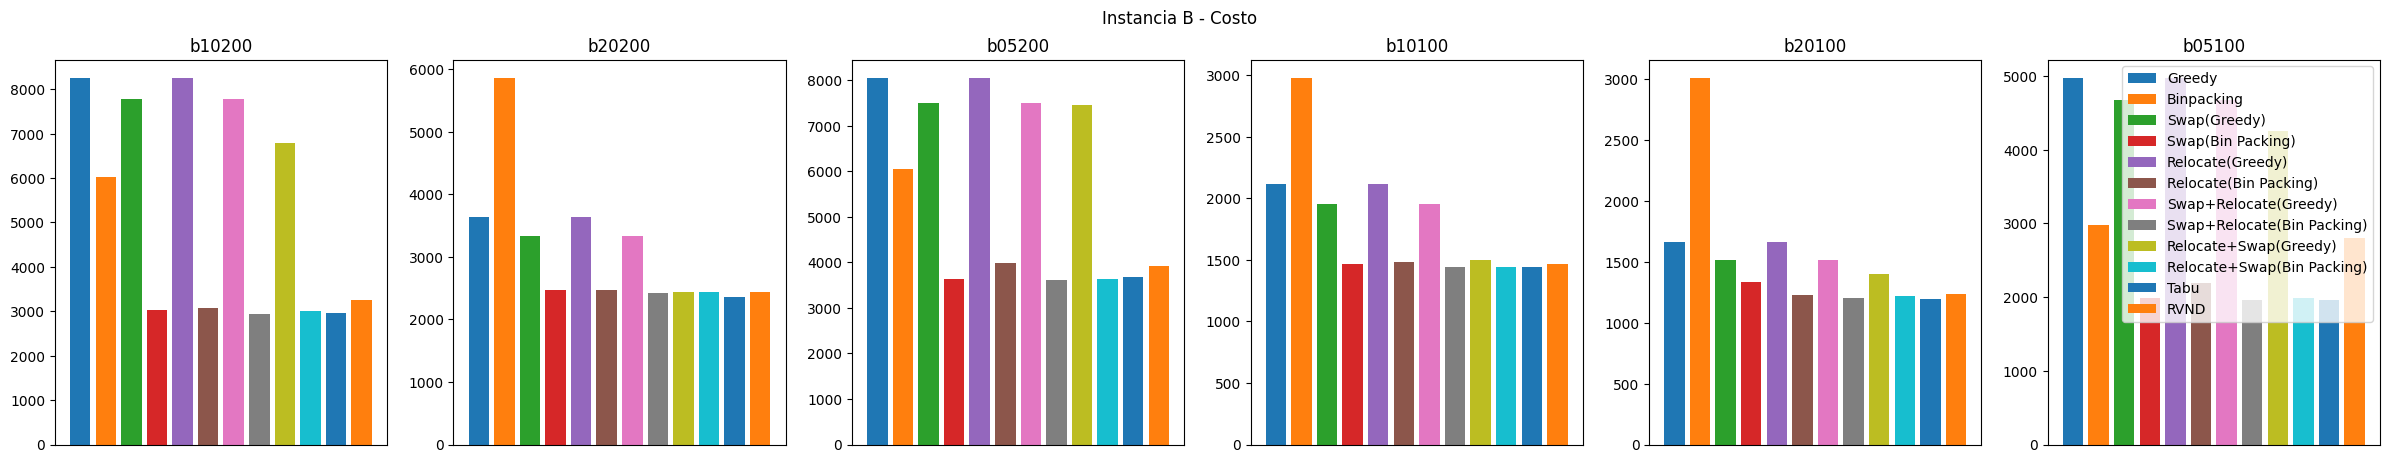

In [19]:
fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia B - Costo")

Text(0.5, 0.98, 'Instancia E - Costo')

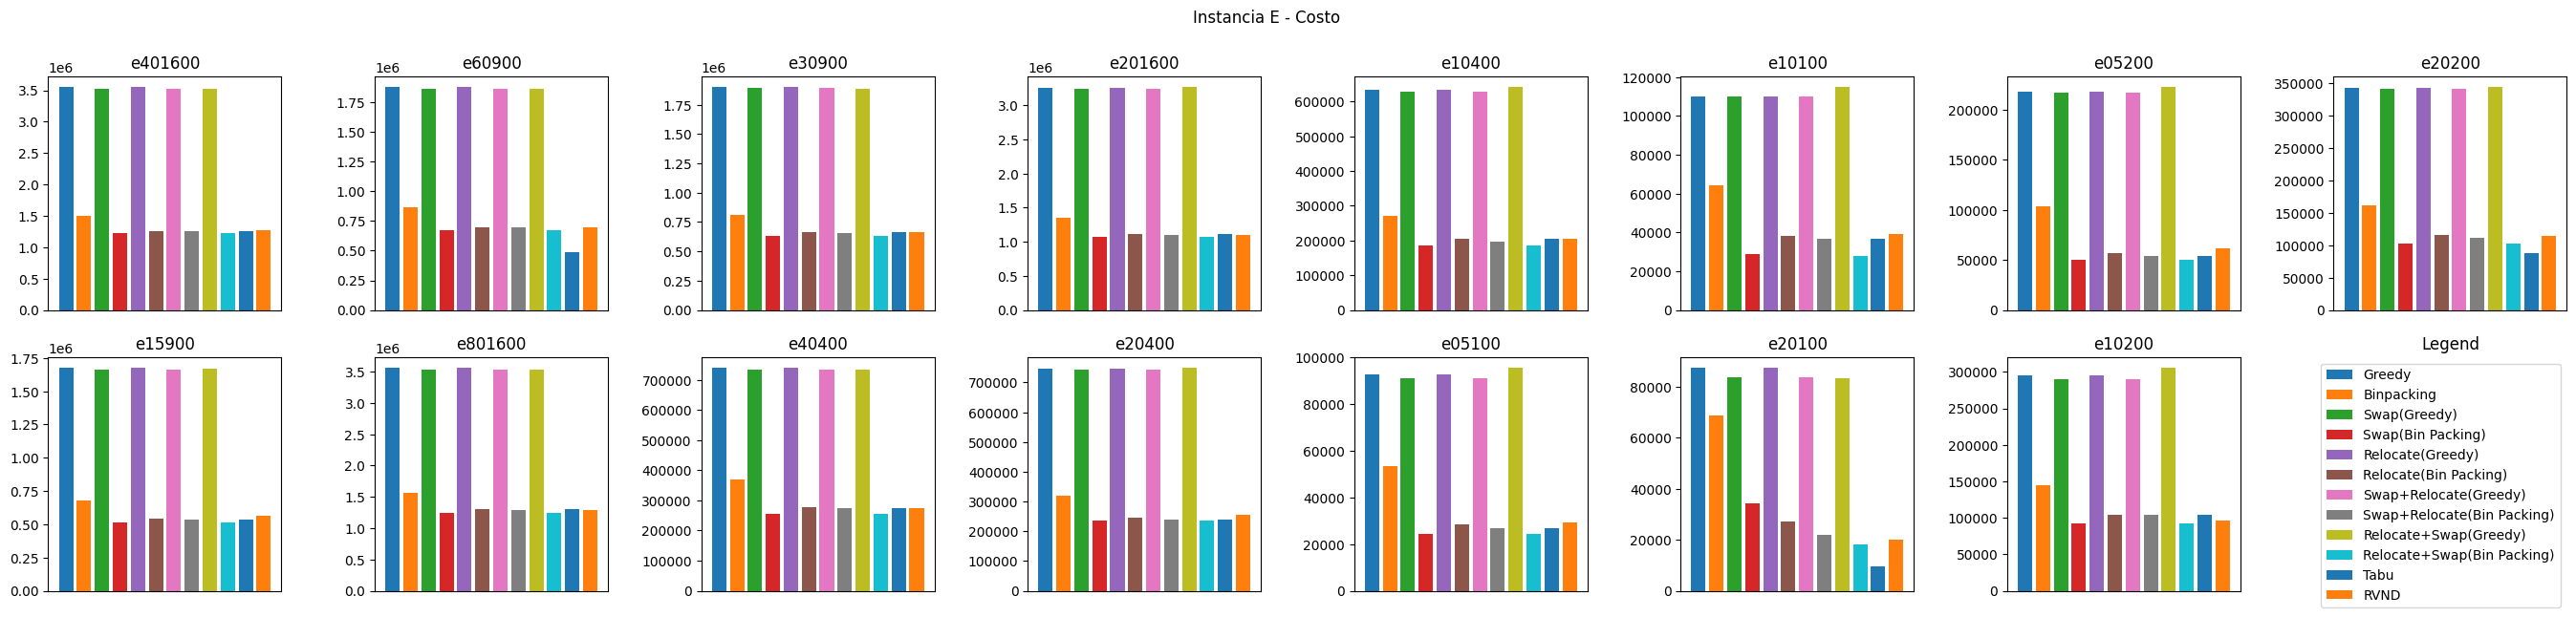

In [20]:
fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_cost"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

fig.suptitle("Instancia E - Costo")

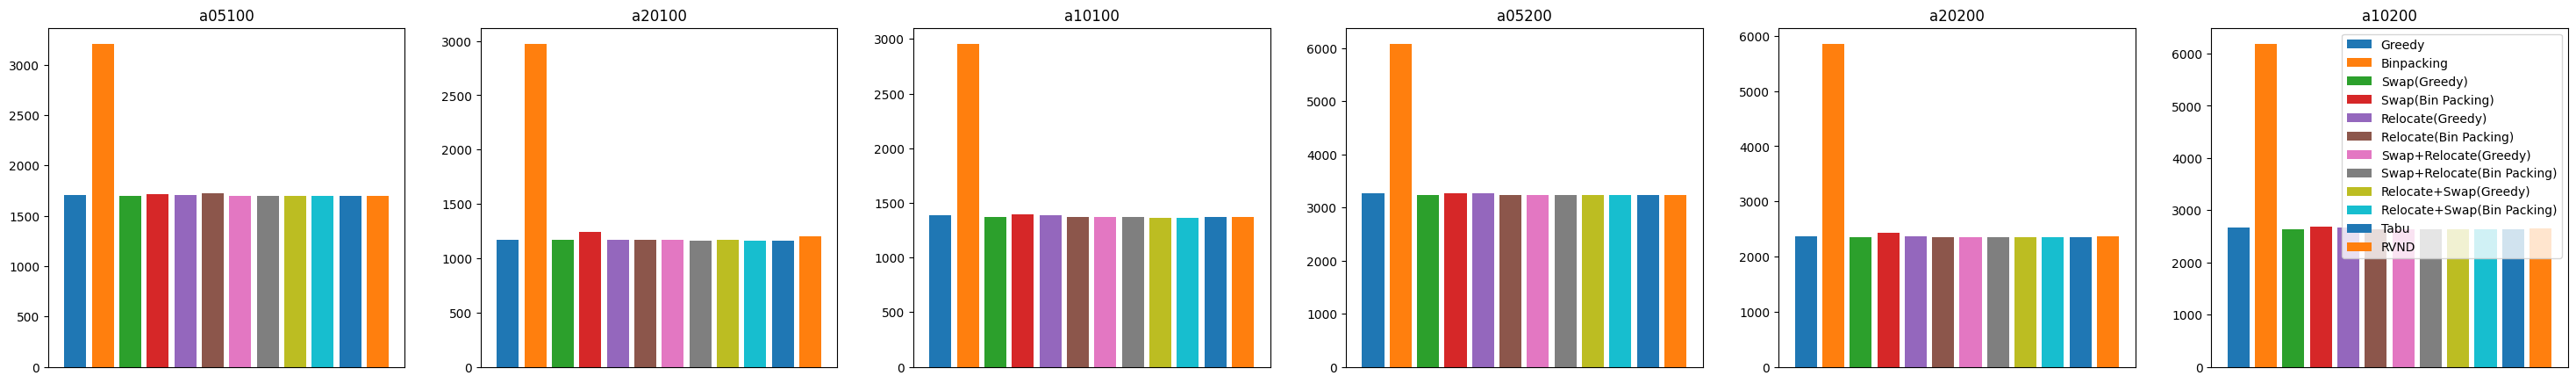

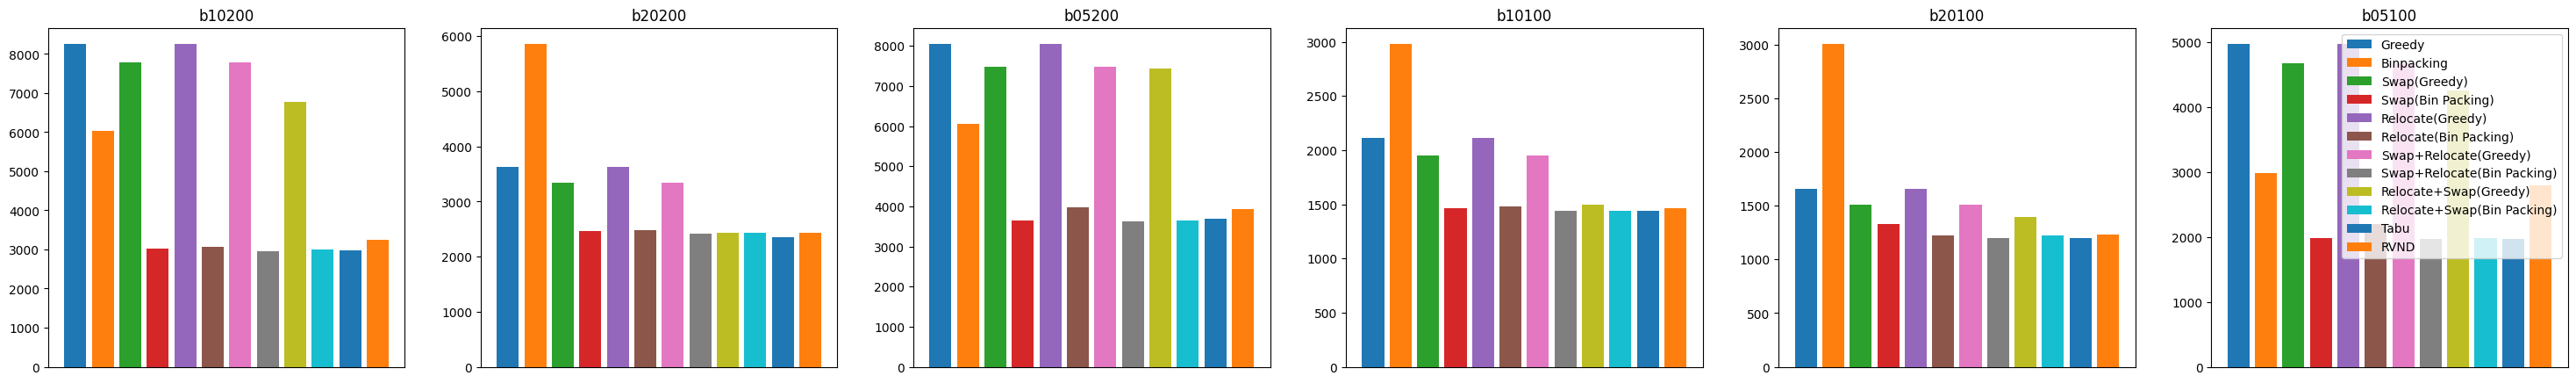

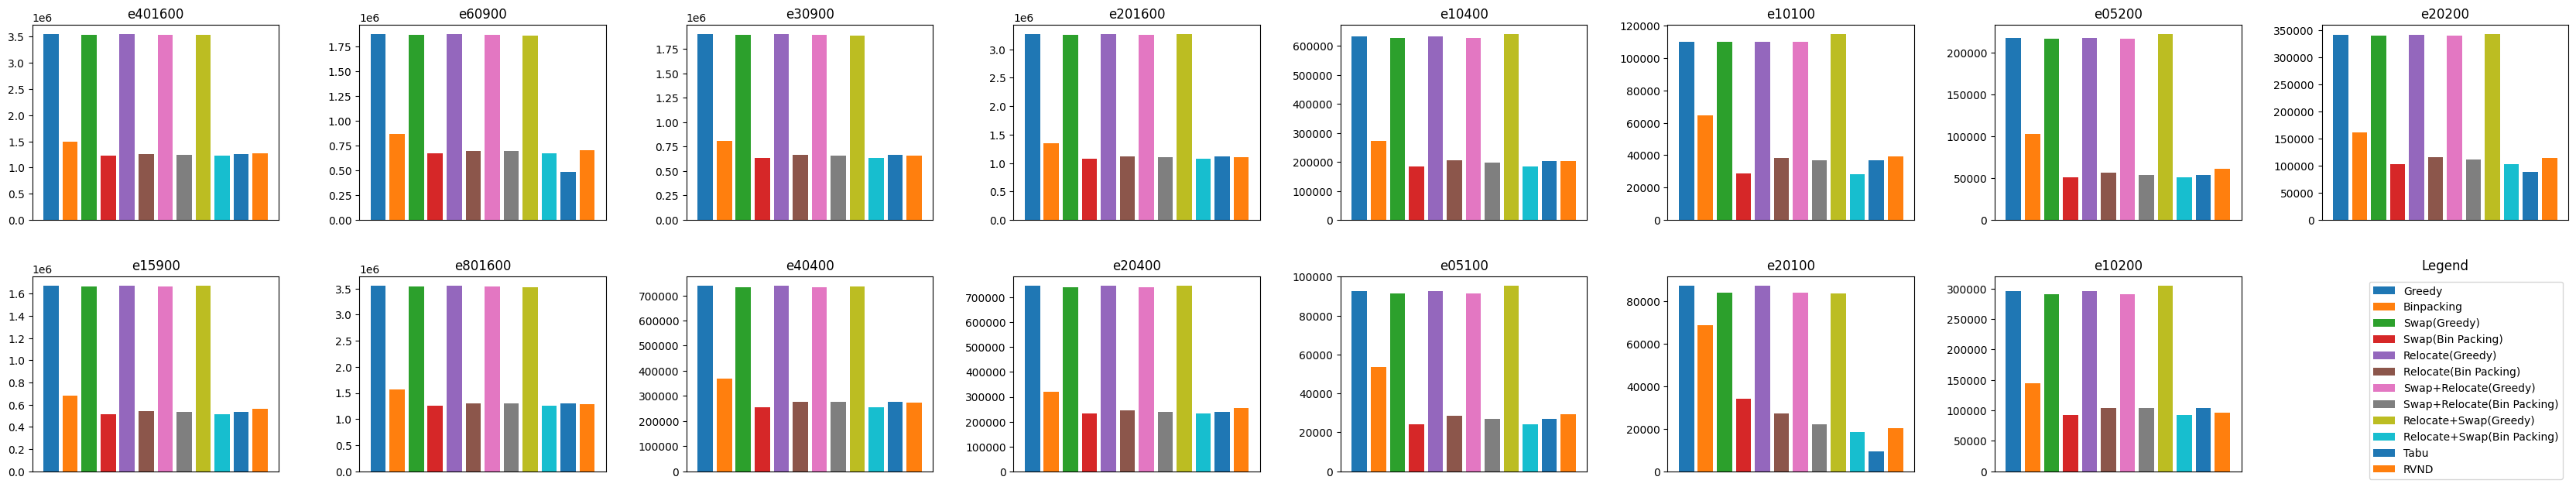

In [21]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia A - Costo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_a_costo.png")

fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia B - Costo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_b_costo.png")

fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_cost"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

#fig.suptitle("Instancia E - Costo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_e_costo.png")

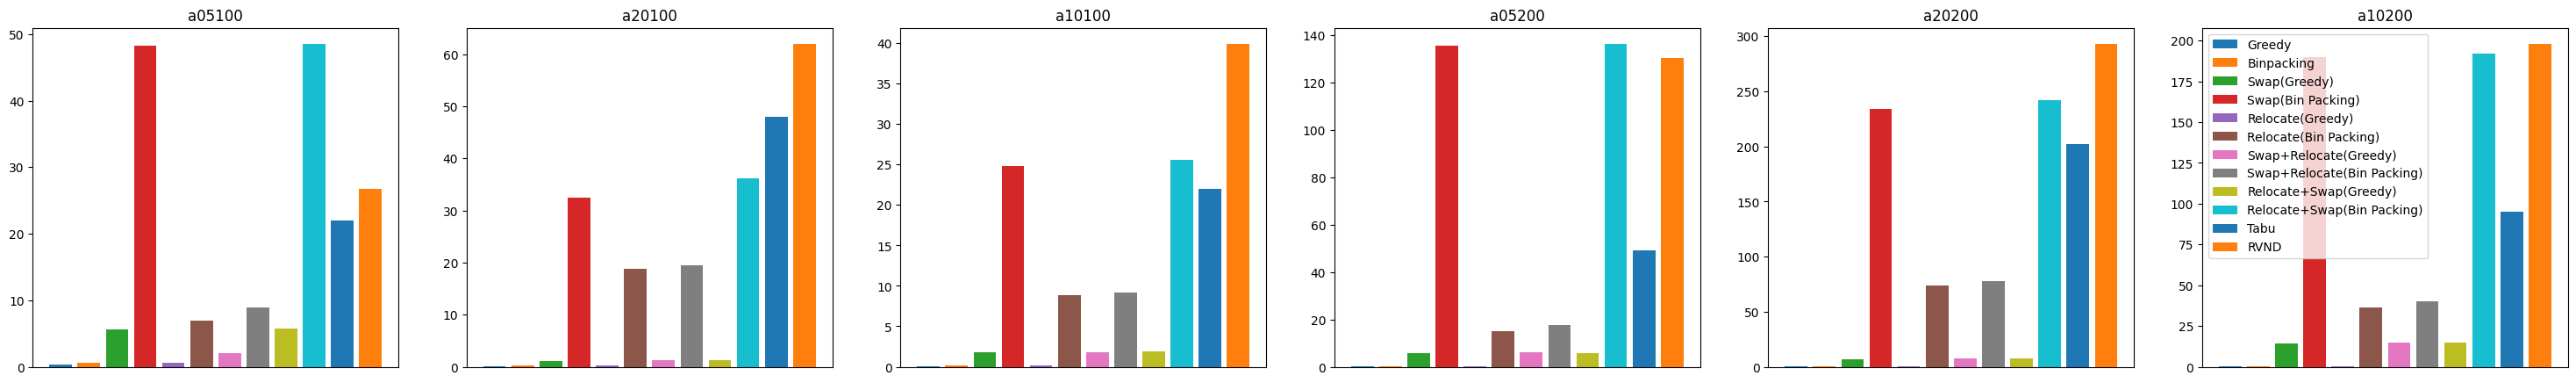

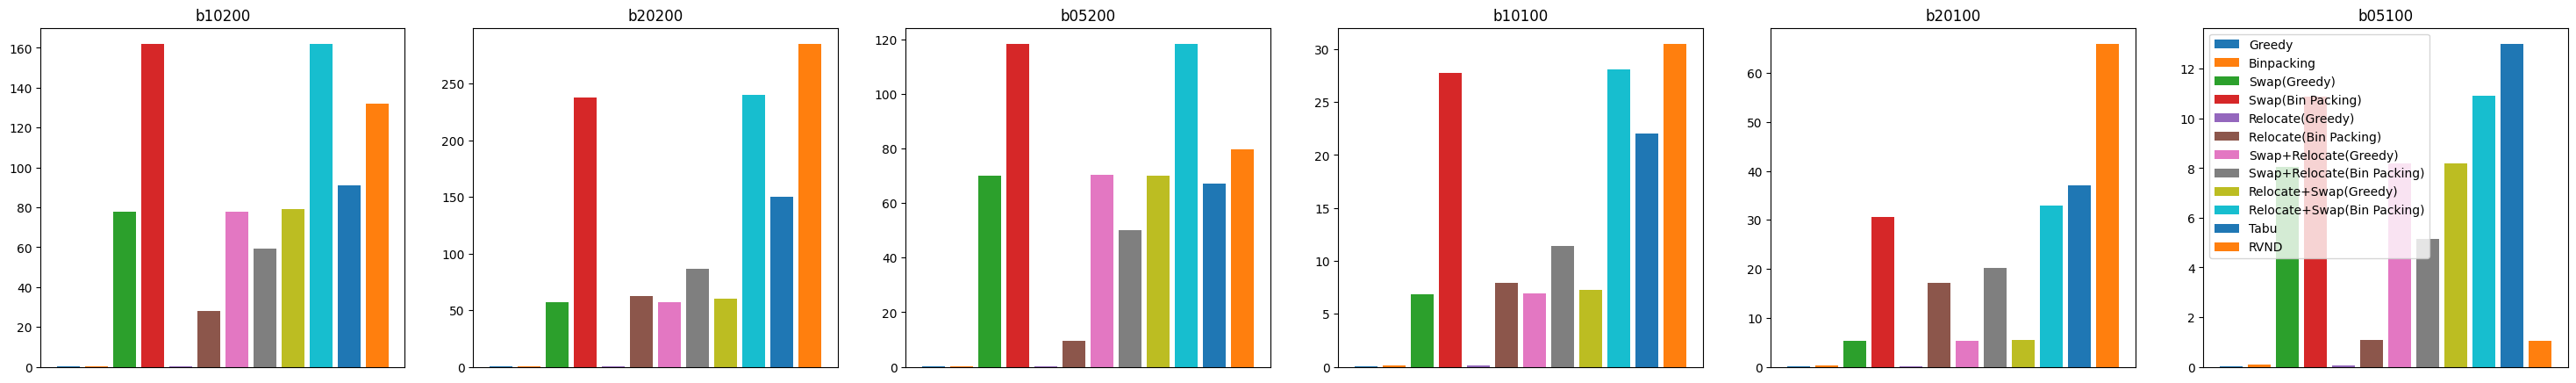

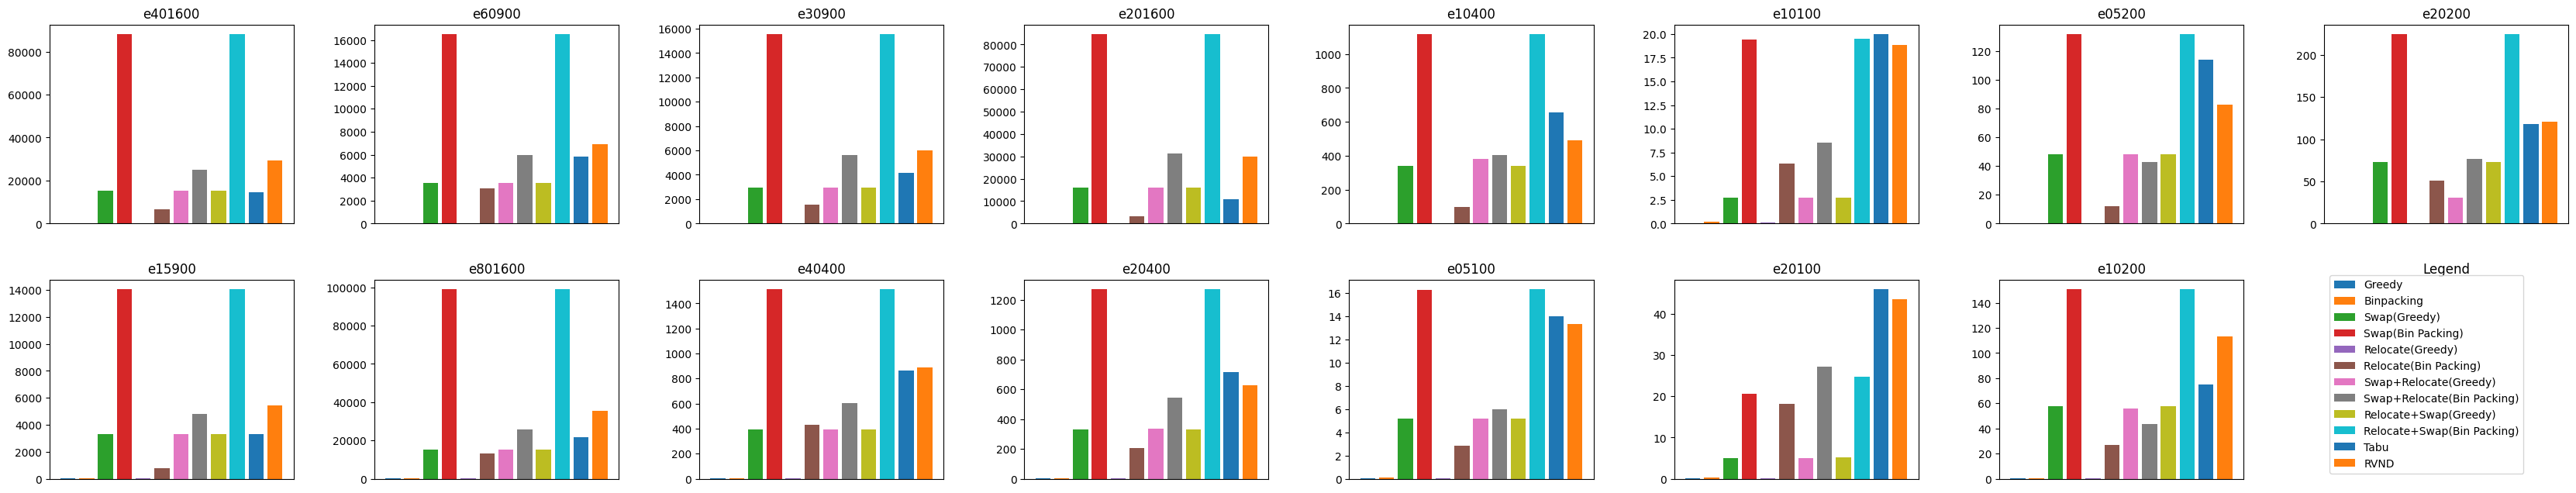

In [22]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_time"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia A - Tiempo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_a_tiempo.png")

fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_time"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia B - Tiempo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_b_tiempo.png")

fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_time"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_time"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

#fig.suptitle("Instancia E - Tiempo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_e_tiempo.png")

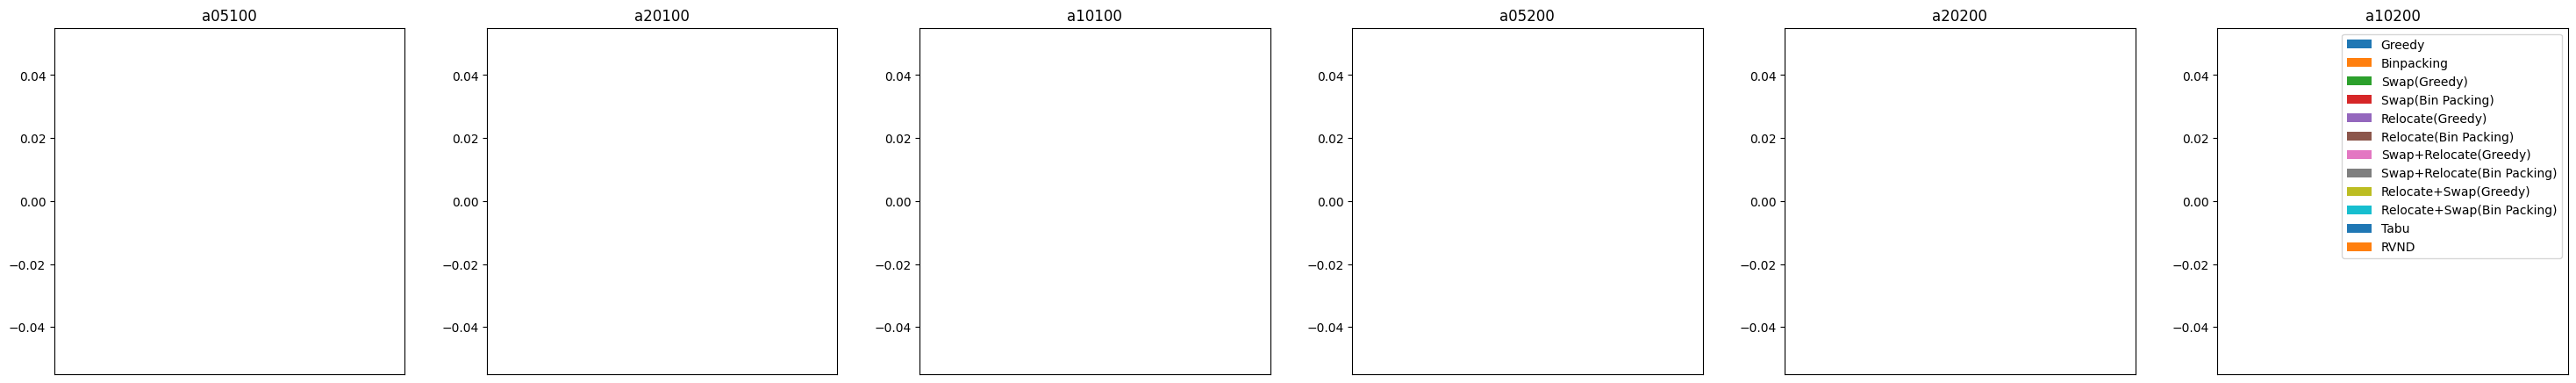

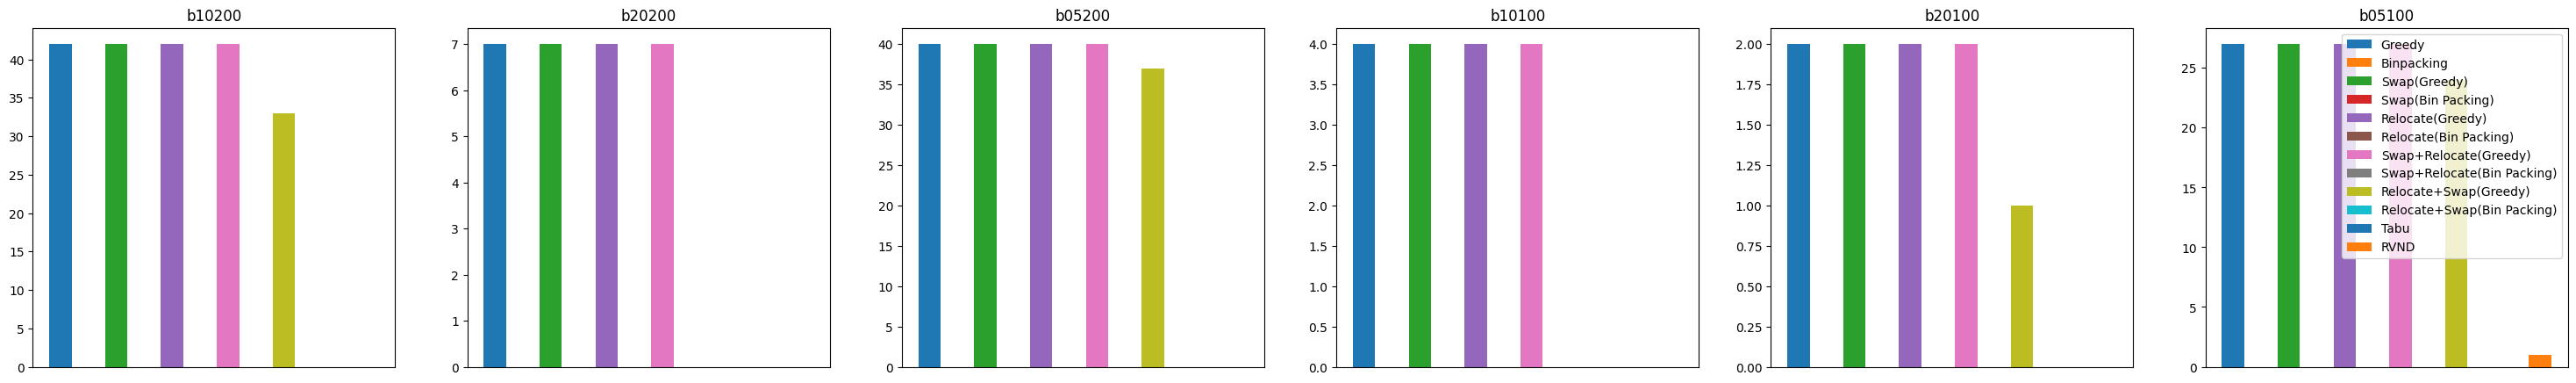

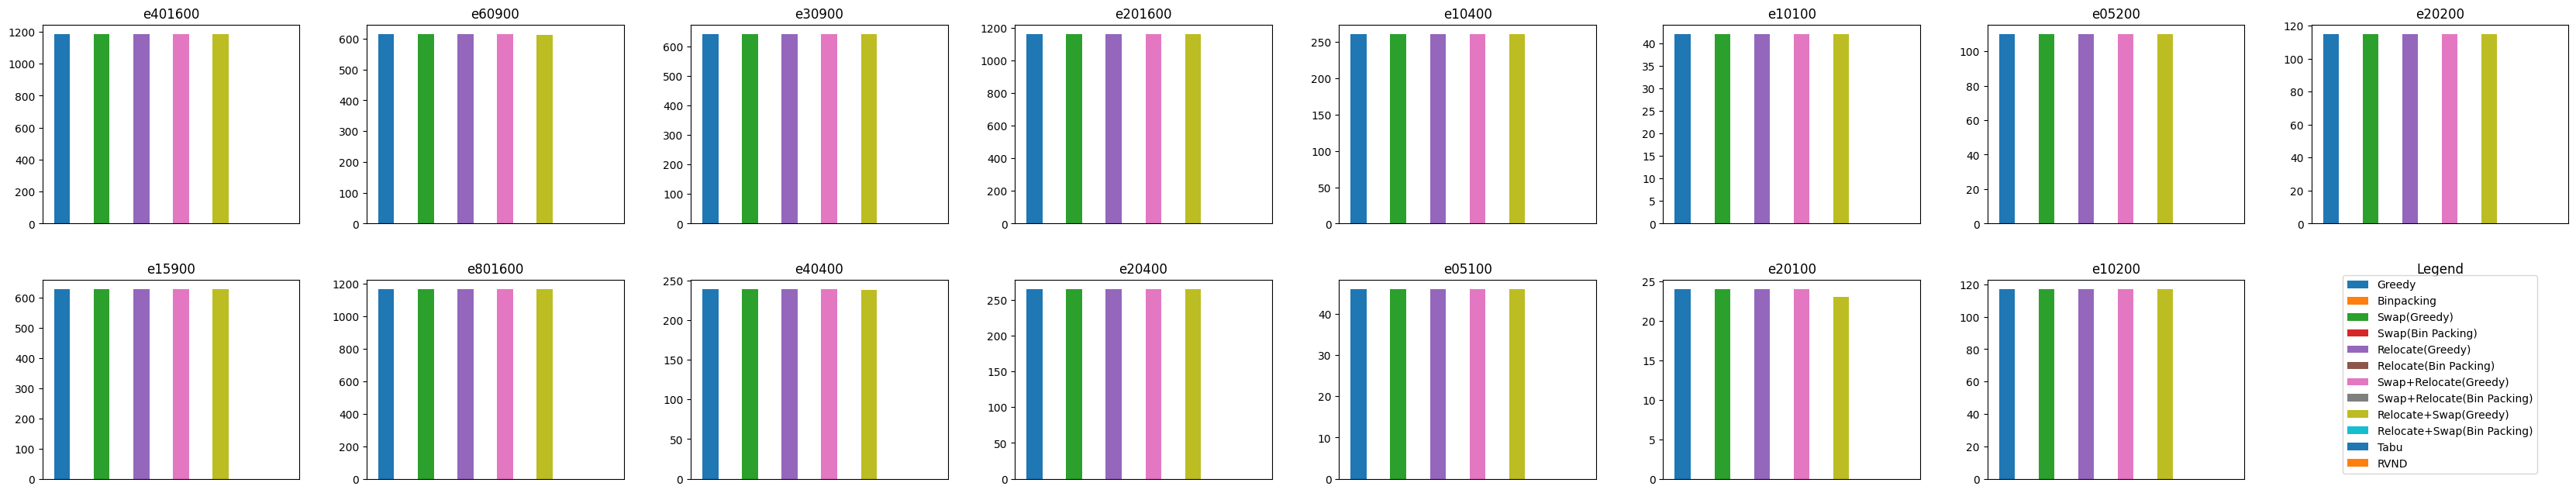

In [23]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_free"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia A - Sin Asignar")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_a_unassigned.png")

fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_free"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia B - Sin Asignar")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_b_unassigned.png")

fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_free"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_free"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

#fig.suptitle("Instancia E - Sin Asignar")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_e_unassigned.png")

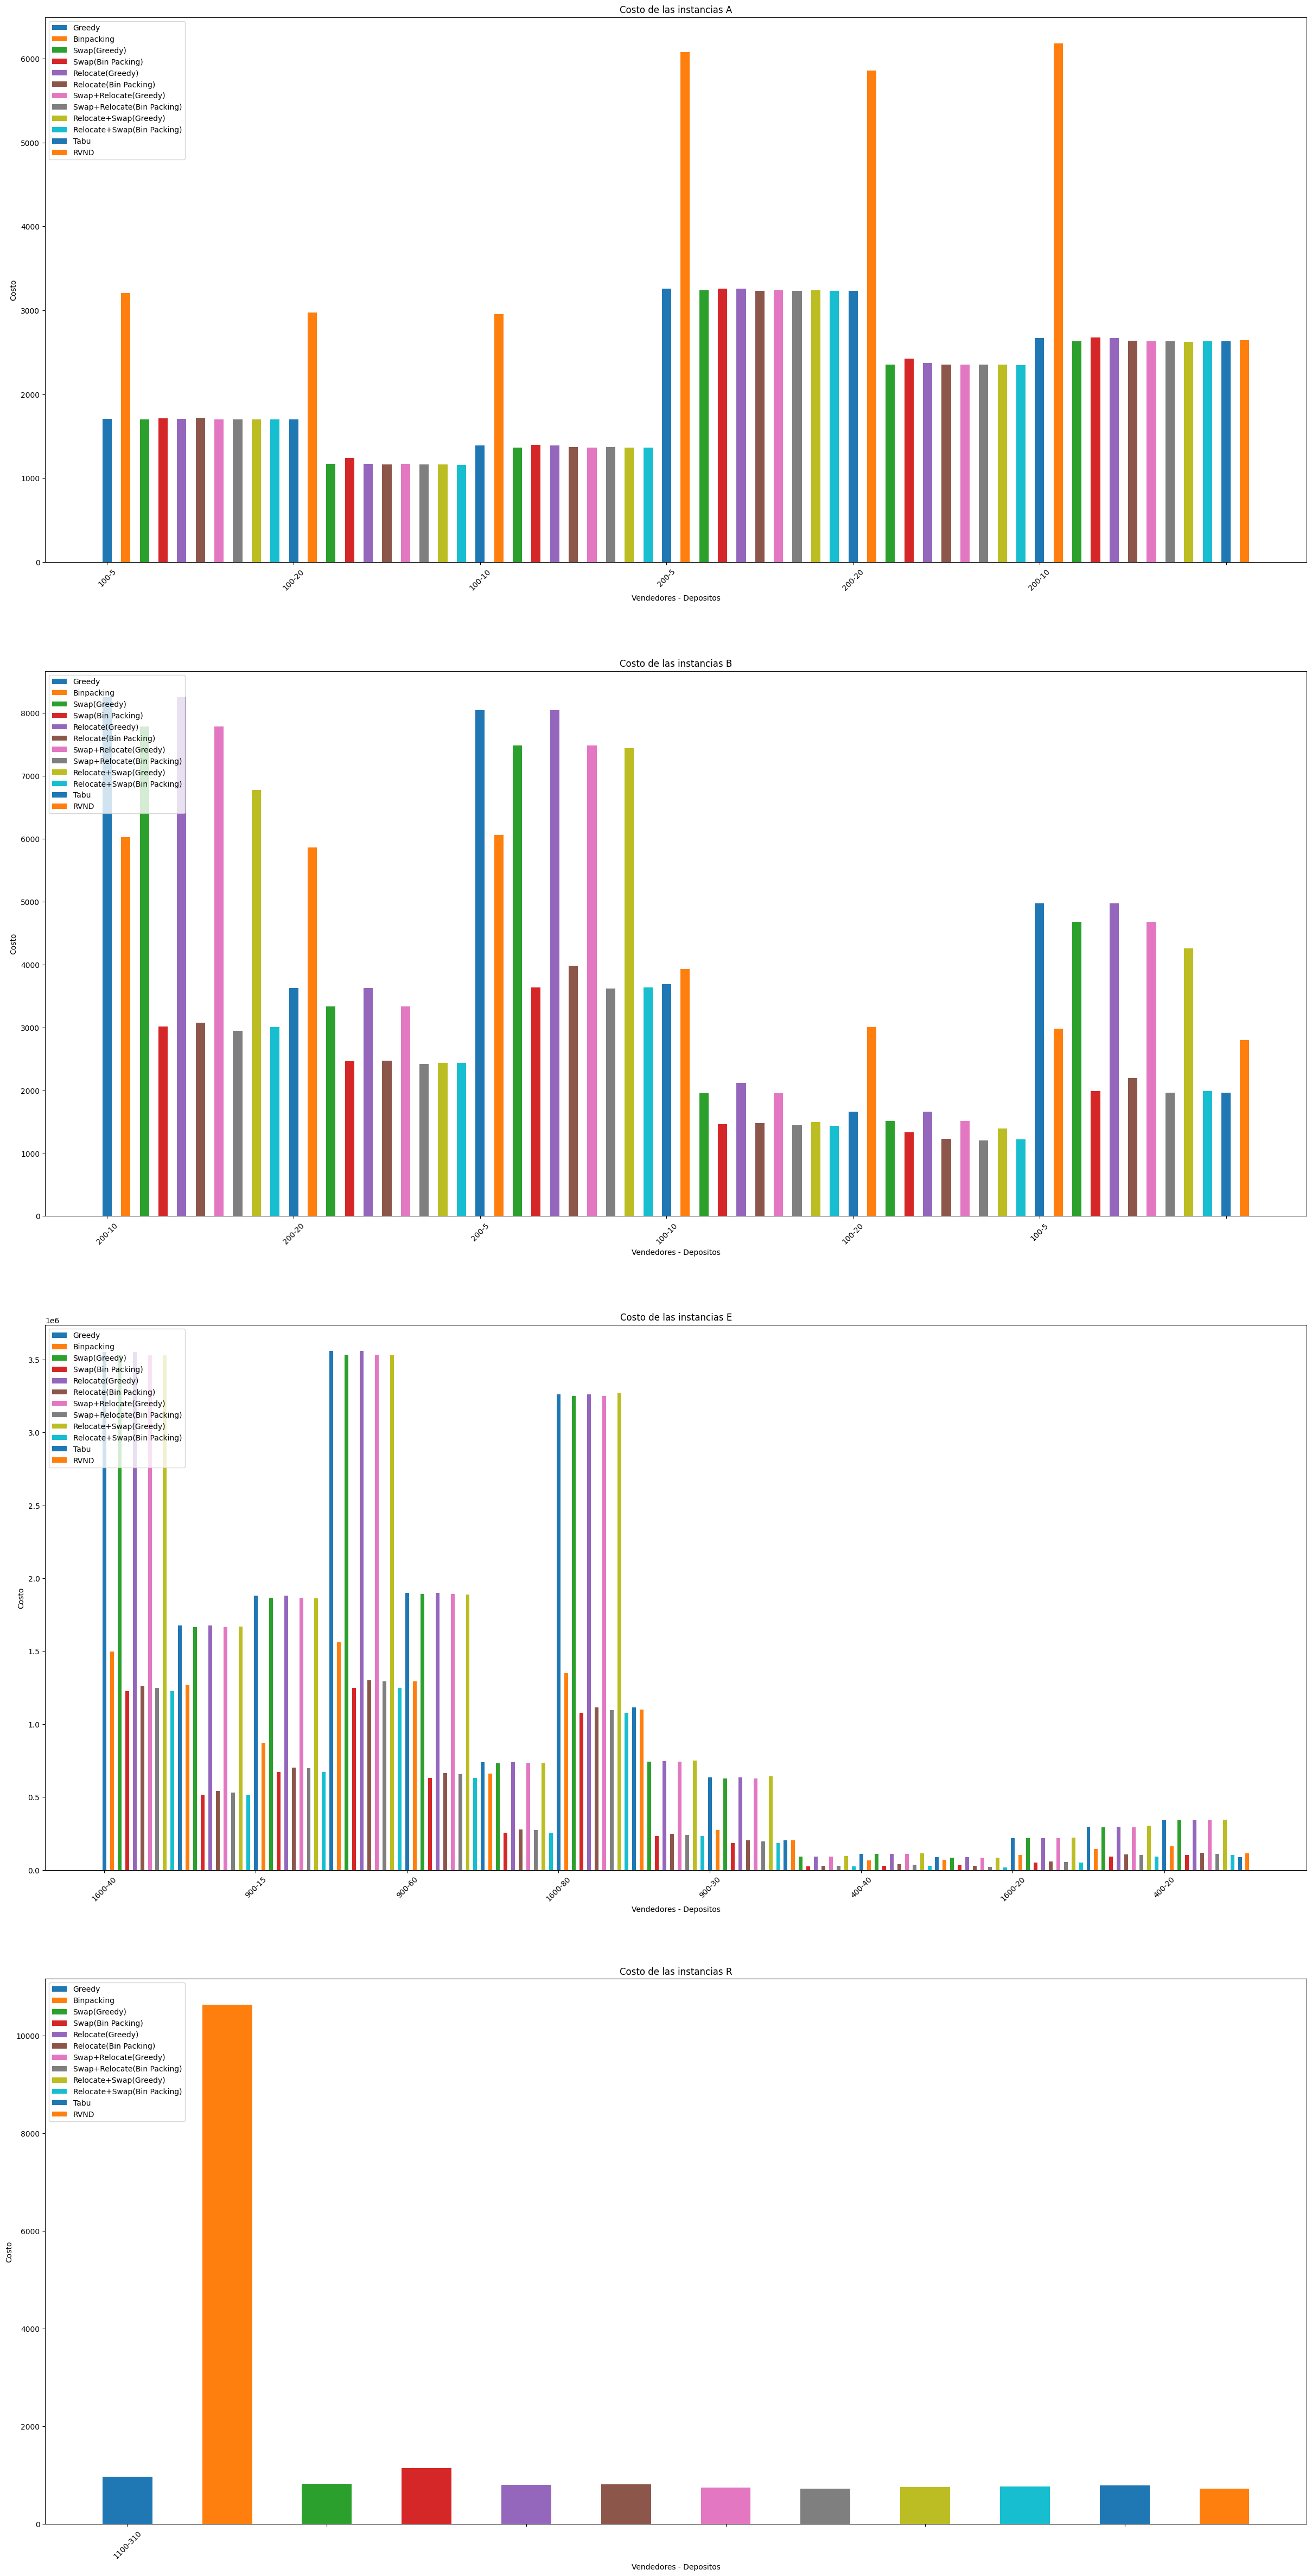

In [24]:
fig, axs = plt.subplots(len(costs), 1, figsize=(30, 60))

for i, cost in enumerate(costs):

    cost['Vendedores-Depositos'] = cost['Vendedores'].astype(str) + '-' + cost['Depositos'].astype(str)

    axs[i].set_title('Costo de las instancias ' + cost['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Costo')

    for h in heuristics:
        axs[i].bar(np.arange(len(cost['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, cost[h+"_cost"], width=0.05, label=h)

    axs[i].legend()

    # add division between 'Vendedores-Depositos'

    axs[i].set_xticklabels([""] + list(cost['Vendedores-Depositos']))



for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(costs[i]['Vendedores-Depositos']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')

    # leave some space between subplots



### 2. TIEMPOS

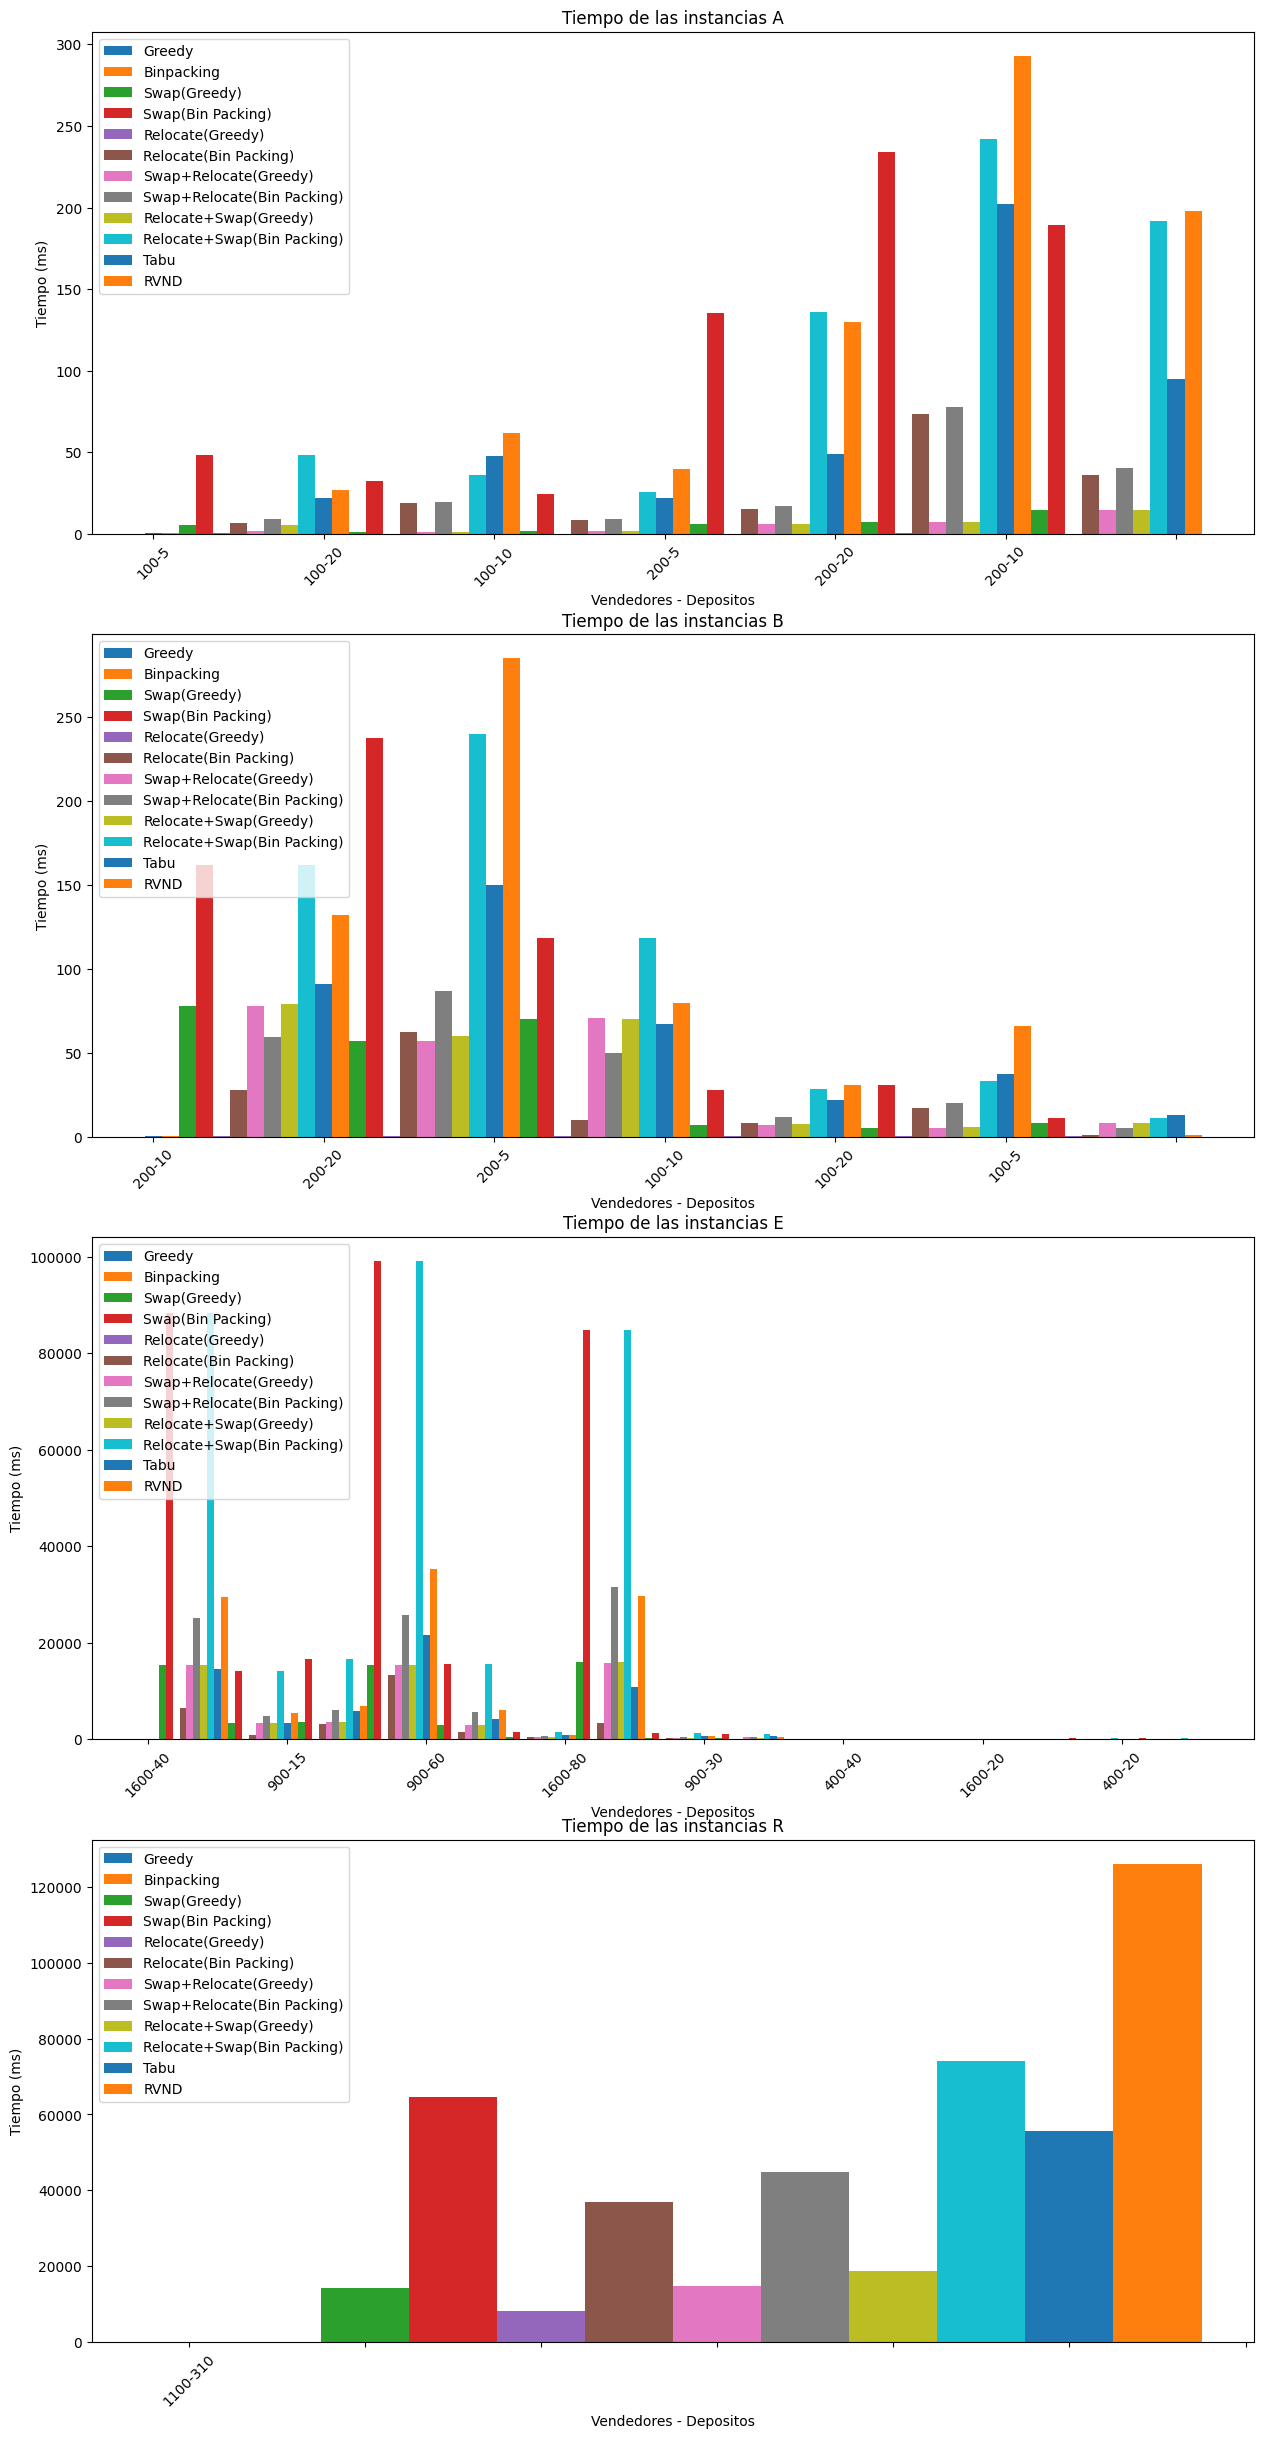

In [25]:
fig, axs = plt.subplots(len(times), 1, figsize=(15, 30))

for i, time in enumerate(times):

    time['Vendedores-Depositos'] = time['Vendedores'].astype(str) + '-' + time['Depositos'].astype(str)

    axs[i].set_title('Tiempo de las instancias ' + time['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Tiempo (ms)')

    for h in heuristics:
        # Bar plot
        axs[i].bar(np.arange(len(time['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, time[h+"_time"], width=0.1, label=h)

    axs[i].legend()

for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(times[i]['Vendedores-Depositos']))
    # rotate x tick labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')


## Cantidad de vendedores sin asignar

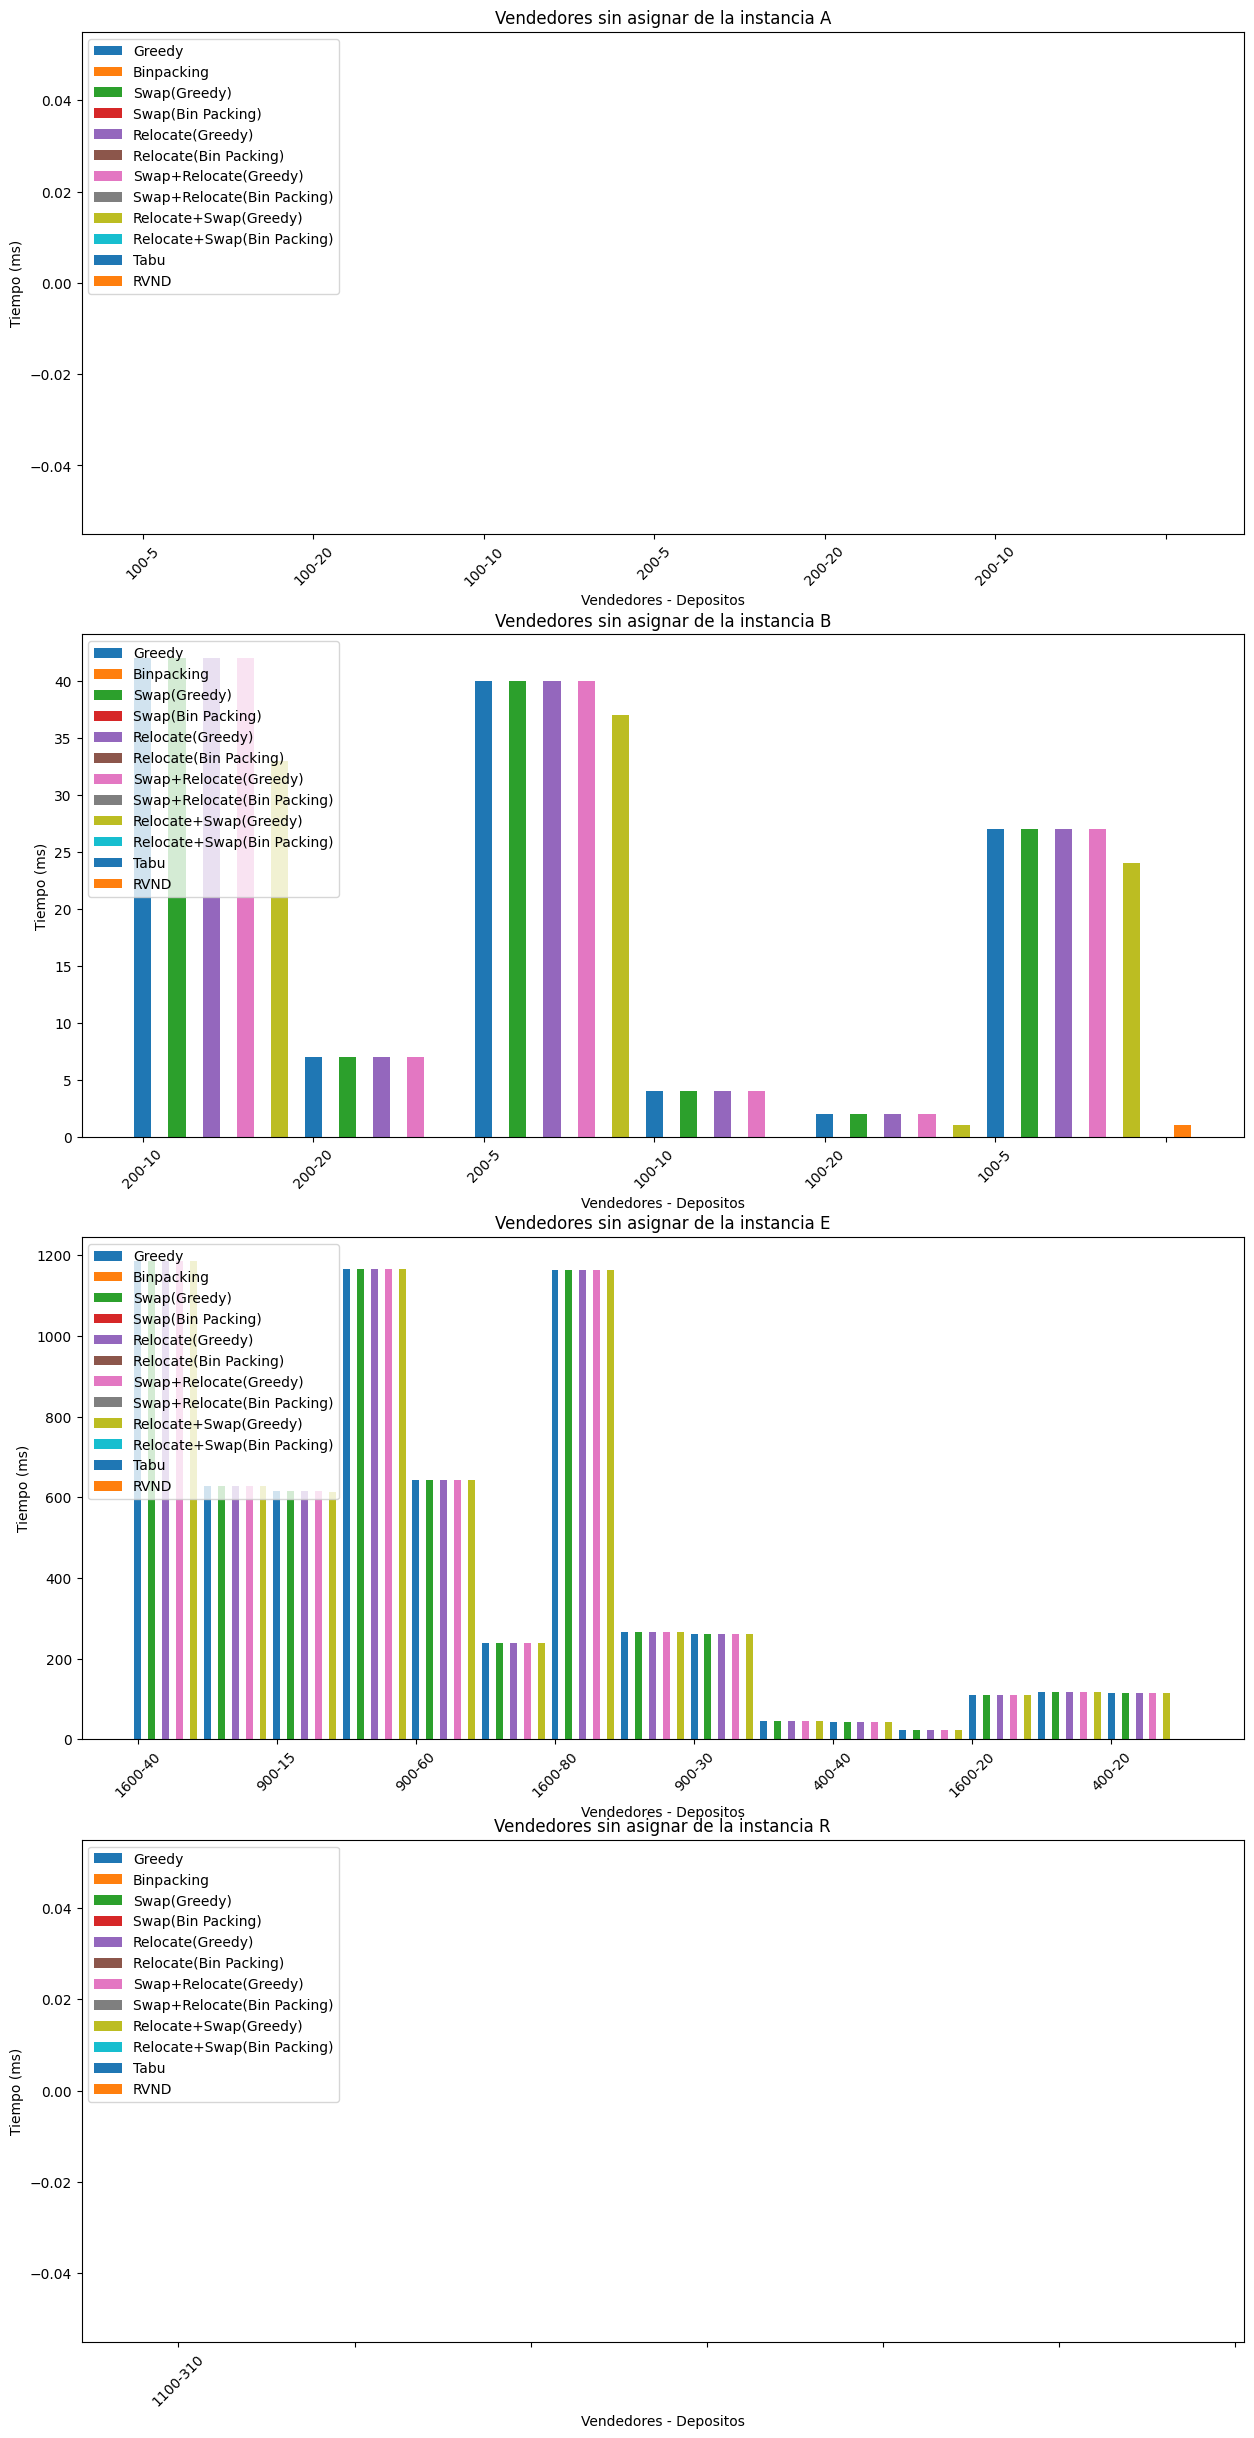

In [26]:
fig, axs = plt.subplots(len(frees), 1, figsize=(15, 30))

for i, free in enumerate(frees):

    free['Vendedores-Depositos'] = free['Vendedores'].astype(str) + '-' + free['Depositos'].astype(str)

    axs[i].set_title('Vendedores sin asignar de la instancia ' + free['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Tiempo (ms)')

    for h in heuristics:
        # Bar plot
        axs[i].bar(np.arange(len(free['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, free[h+"_free"], width=0.1, label=h)

    axs[i].legend()

for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(frees[i]['Vendedores-Depositos']))
    # rotate x tick labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')


### 3. INSTANCIA REAL

In [27]:
real_instance[heuristics + '_cost']

,Greedy_cost,Binpacking_cost,Swap(Greedy)_cost,Swap(Bin Packing)_cost,Relocate(Greedy)_cost,Relocate(Bin Packing)_cost,Swap+Relocate(Greedy)_cost,Swap+Relocate(Bin Packing)_cost,Relocate+Swap(Greedy)_cost,Relocate+Swap(Bin Packing)_cost,Tabu_cost,RVND_cost
27,964.9,10629.0,824.2,1146.8,792.3,809.4,739.4,725.0,747.9,764.7,791.8,718.9


In [28]:
real_instance[heuristics + '_time']

,Greedy_time,Binpacking_time,Swap(Greedy)_time,Swap(Bin Packing)_time,Relocate(Greedy)_time,Relocate(Bin Packing)_time,Swap+Relocate(Greedy)_time,Swap+Relocate(Bin Packing)_time,Relocate+Swap(Greedy)_time,Relocate+Swap(Bin Packing)_time,Tabu_time,RVND_time
27,9.84775,39.621,14150.6,64725.8,8141.22,36829.6,14855.7,44884.7,18586.7,74175.0,55719,126242.0


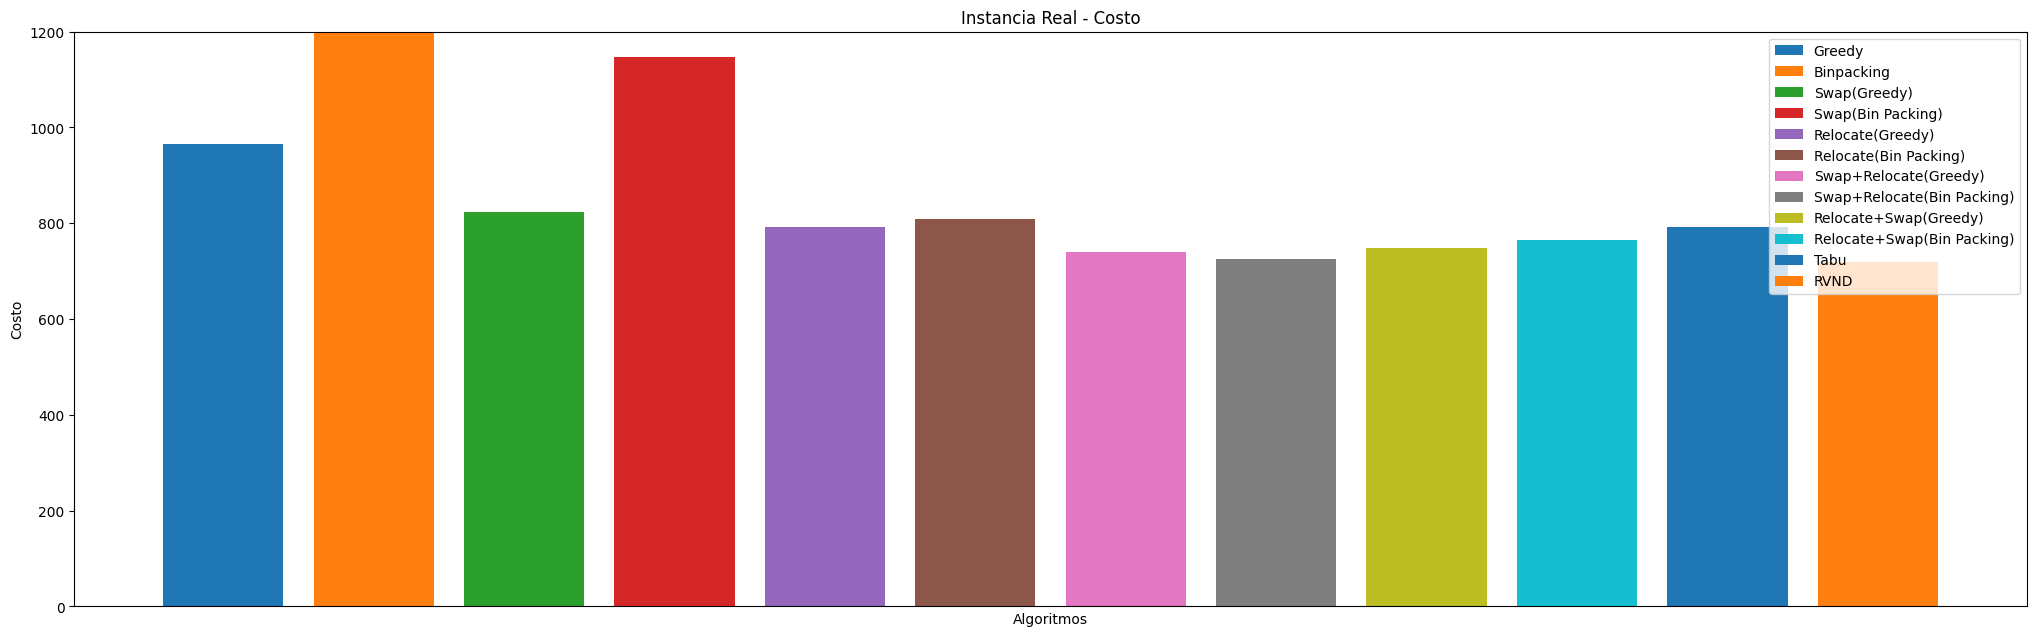

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(21, 7))

for h in heuristics:
    # itter through real_instance rows
    row = real_instance.iloc[0]
    ax.bar(h, row[h + "_cost"], label=h)

    # for tick in ax.get_xticklabels():
        # tick.set_rotation(90)

    # delete x_ticks
    ax.set_xticks([])

    ax.set_title(row["Filename"])
    ax.set_xlabel("Algoritmos")
    ax.set_ylabel("Costo")
    ax.set_title("Instancia Real - Costo")
    ax.set_ylim(0, 1200)

plt.legend()
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_real_cost.png")

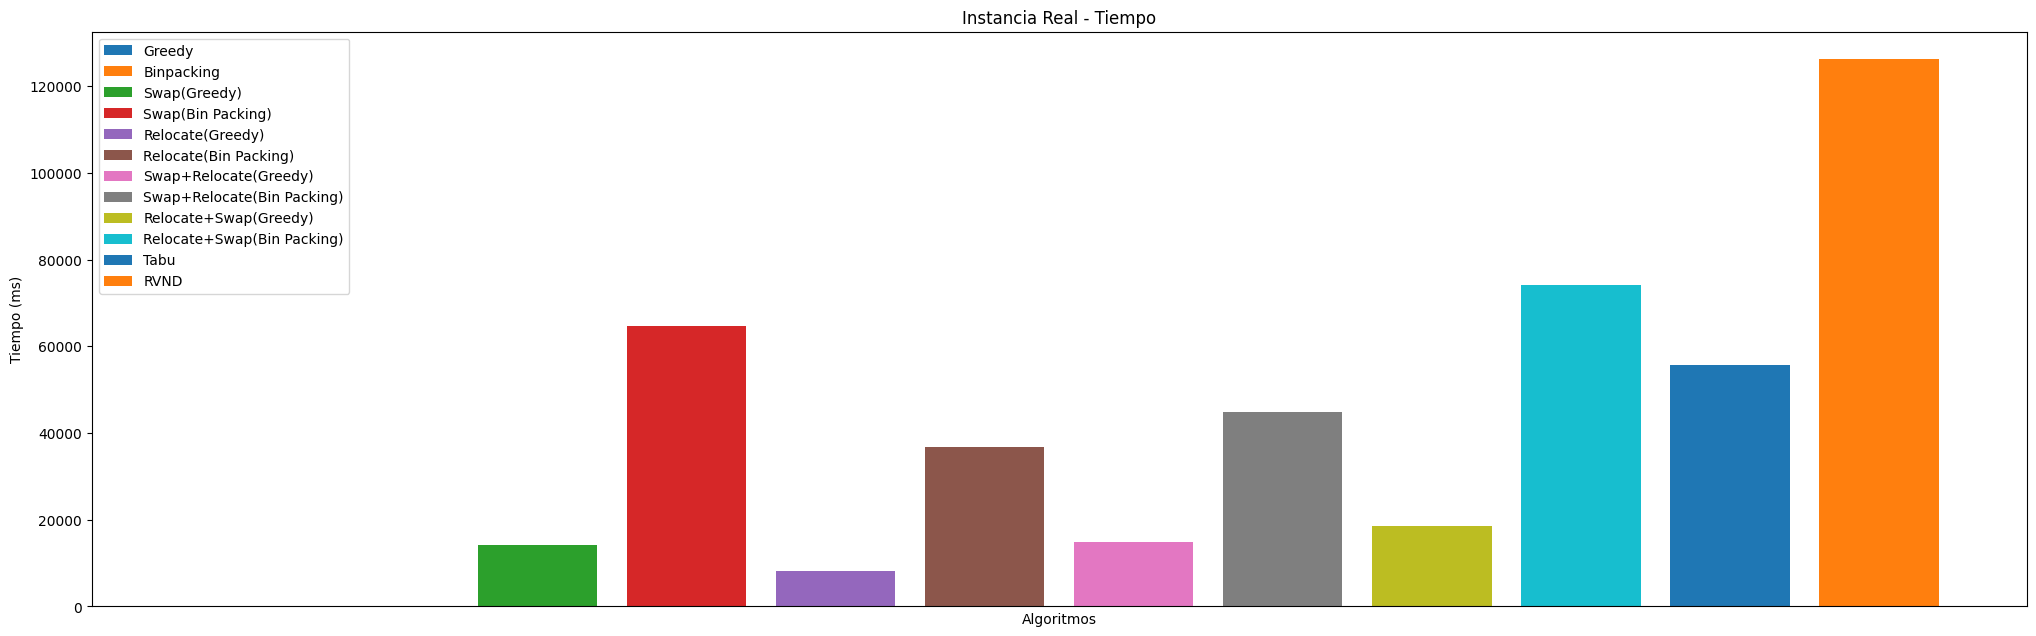

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(21, 7))

for h in heuristics:
    # itter through real_instance rows
    row = real_instance.iloc[0]
    ax.bar(h, row[h + "_time"], label=h)

    # for tick in ax.get_xticklabels():
        # tick.set_rotation(90)

    # delete x_ticks
    ax.set_xticks([])

    ax.set_title(row["Filename"])
    ax.set_xlabel("Algoritmos")
    ax.set_ylabel("Tiempo (ms)")
    ax.set_title("Instancia Real - Tiempo")
    # ax.set_ylim(0, 1000)

plt.legend()
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_real_time.png")

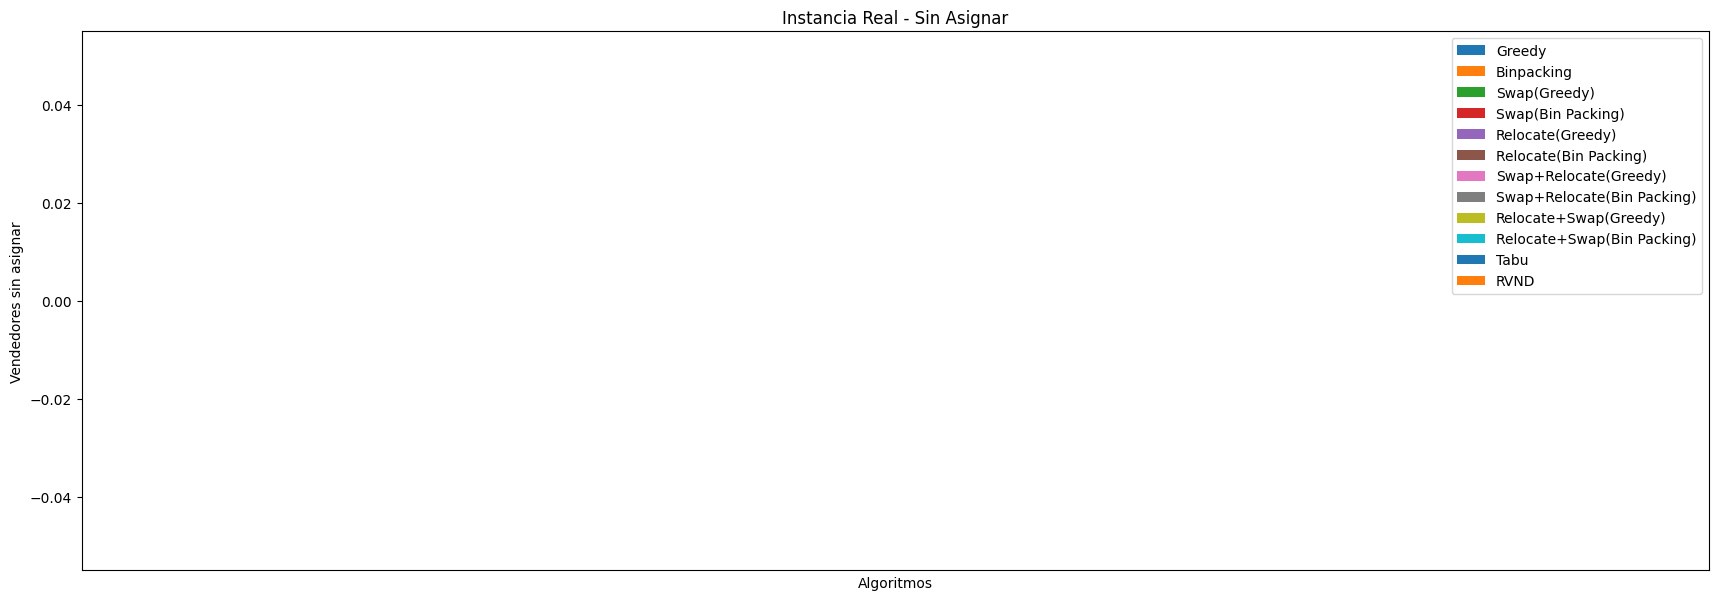

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(21, 7))

for h in heuristics:
    # itter through real_instance rows
    row = real_instance.iloc[0]
    ax.bar(h, row[h + "_free"], label=h)

    # for tick in ax.get_xticklabels():
        # tick.set_rotation(90)

    # delete x_ticks
    ax.set_xticks([])

    ax.set_title(row["Filename"])
    ax.set_xlabel("Algoritmos")
    ax.set_ylabel("Vendedores sin asignar")
    ax.set_title("Instancia Real - Sin Asignar")
    # ax.set_ylim(0, 1000)

plt.legend()

In [32]:
#Drop Filename column and InstanceGroup column
a_costs_table = costs[0].drop(columns=["Filename", "InstanceGroup", "Vendedores-Depositos"]).to_markdown(index=False)

pyperclip.copy(a_costs_table)

In [33]:
costs[-1]

,Filename,Depositos,Vendedores,Greedy_cost,Binpacking_cost,Swap(Greedy)_cost,Swap(Bin Packing)_cost,Relocate(Greedy)_cost,Relocate(Bin Packing)_cost,Swap+Relocate(Greedy)_cost,Swap+Relocate(Bin Packing)_cost,Relocate+Swap(Greedy)_cost,Relocate+Swap(Bin Packing)_cost,Tabu_cost,RVND_cost,InstanceGroup,Vendedores-Depositos
27,real_instance,310,1100,964.9,10629.0,824.2,1146.8,792.3,809.4,739.4,725.0,747.9,764.7,791.8,718.9,r,1100-310


In [34]:
#Drop Filename column and InstanceGroup column
real_costs_table = costs[-1].drop(columns=["Filename", "InstanceGroup", "Vendedores-Depositos"]).to_markdown(index=False)

pyperclip.copy(real_costs_table)